___

<a href='http://www.pieriandata.com'><img src='content/Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Анализ и кластеризация стран


Источник данных: все данные былы созданы на основе данных следующего источника: 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Цель: 

### Найти похожие между собой страны и регионы, экспериментируя с различным количеством кластеров. <br><br> Что означают полученные кластеры? <br><br> *Замечание: в этой задаче нет 100% правильных ответов, в видео-лекции мы обсуждаем один из вариантов интерпретации результатов.*

----

## Импорт библиотек и загрузка данных

**Задание: Запустите ячейки ниже для импорта библиотек и загрузки данных из файла в датайфрейм Pandas.**

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('../DATA/CIA_Country_Facts.csv')

## Исследование данных (Exploratory Data Analysis)

**Задание: посмотрите на строки и колонки в данных, в том числе на типы данных для колонок.**

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


# Визуализация данных

Давайте построим некоторые графики для визуализации данных. Кроме предложенных графиков ниже, Вы также можете создать любые дополнительные визуализации данных, которые покажутся Вам интересными!

**Задание: постройте гистограмму для колонки Population.**

<AxesSubplot:xlabel='Population', ylabel='Count'>

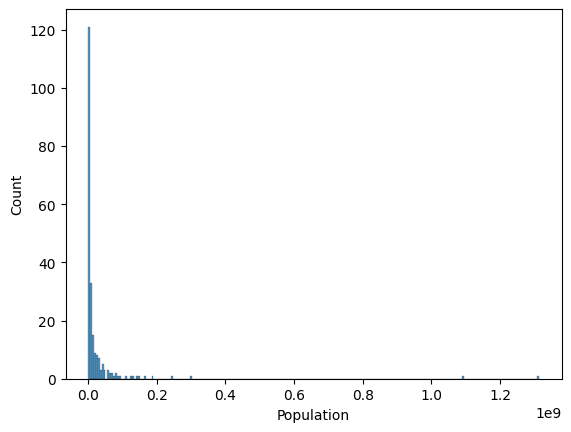

In [14]:
sns.histplot(data=df, x='Population')

**Задание: Вы заметите, что гистограмма очень перекошена из-за нескольких очень больших стран. Поменяйте график таким образом, чтобы показывать только страны с населением меньше 0.5 миллиарда людей.**

<AxesSubplot:xlabel='Population', ylabel='Count'>

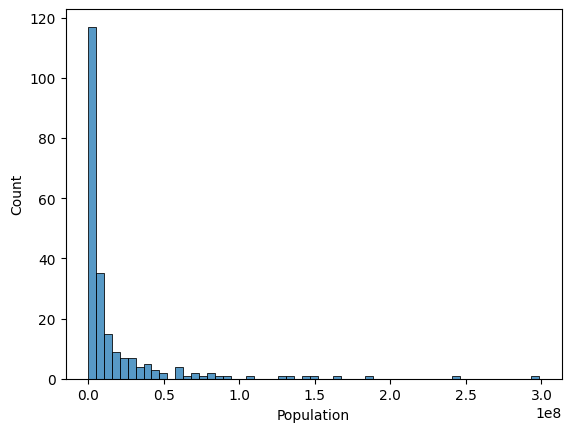

In [20]:
sns.histplot(data=df[df['Population'] < 5 * 10 ** 8], x='Population')

**Задание: далее исследуем GDP (ВВП - Валовый Внутренний Продукт) и регионы (Regions). Постройте график barchart, на котором изобразите среднее ВВП на душу населения (GDP per Capita) для каждого региона.**

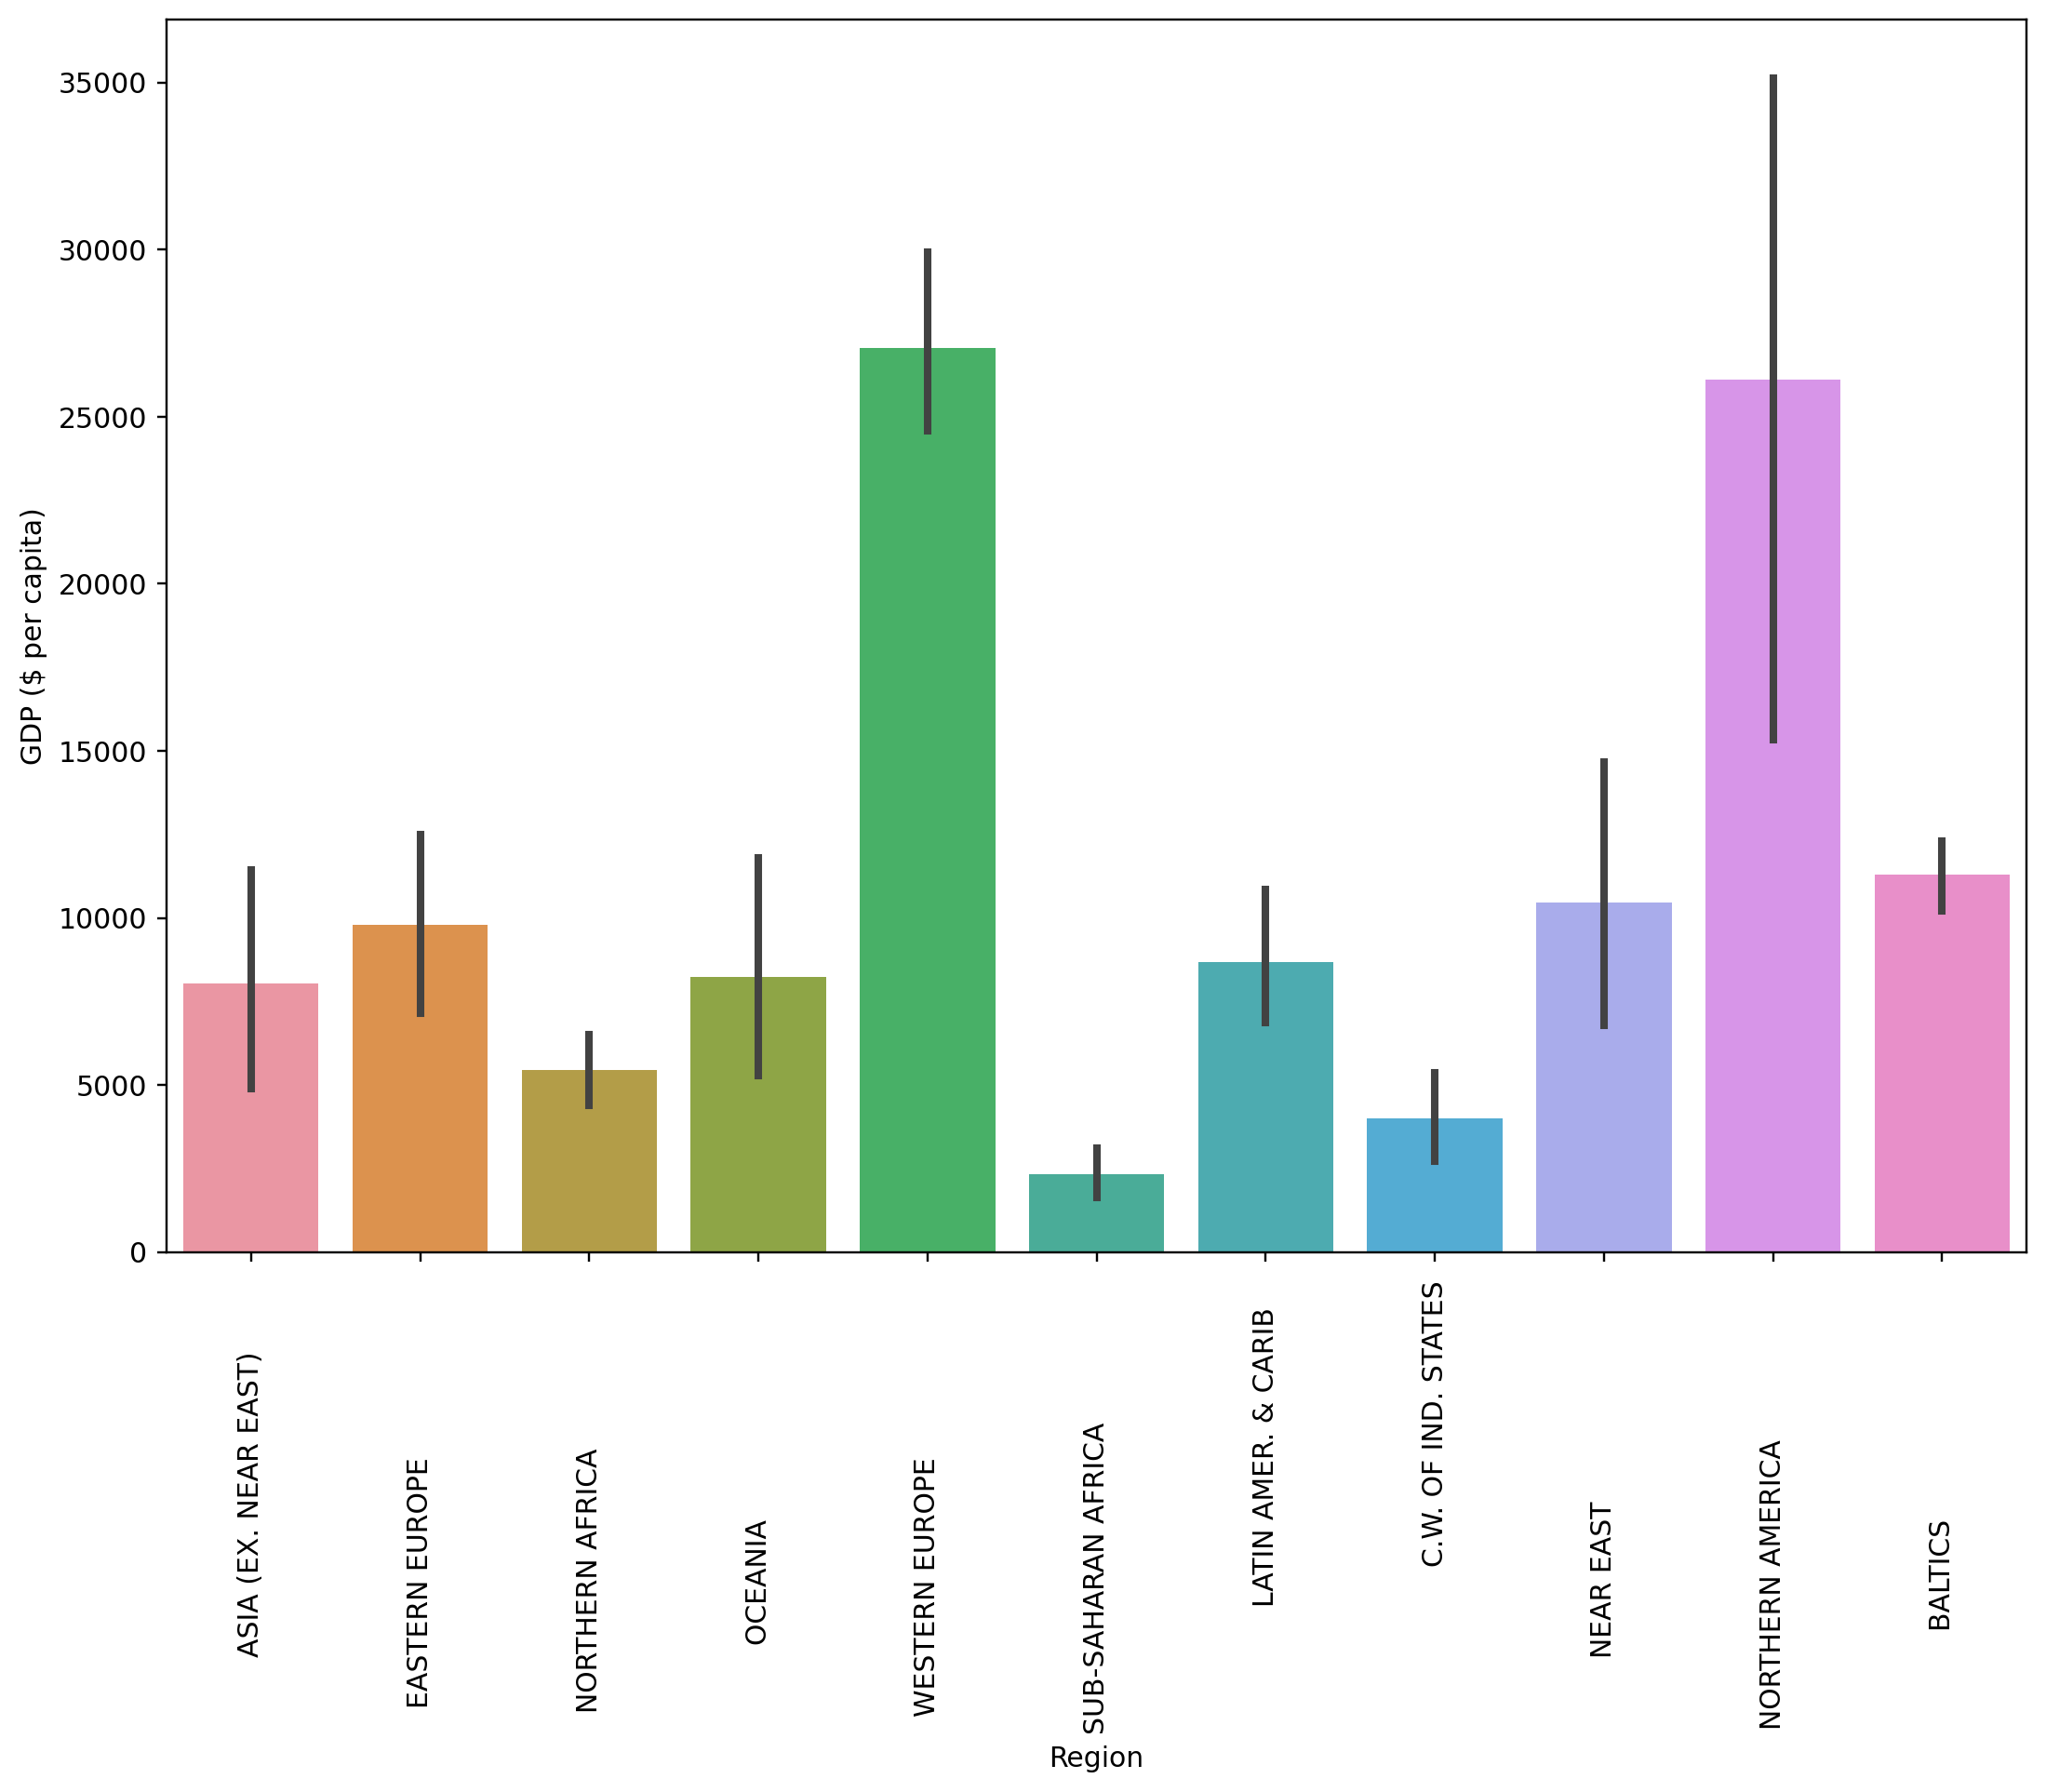

In [25]:
plt.figure(figsize=(12, 8), dpi=215)

sns.barplot(data=df, x='Region', y='GDP ($ per capita)')

plt.xticks(rotation=90)
plt.show()

**Задание: Постройте график scatterplot для визуализации связи между колонками "кол-во телефонов на одну тысячу человек" и "ВВП на душу населения". Раскрасьте этот график разными цветами по колонке Region.**

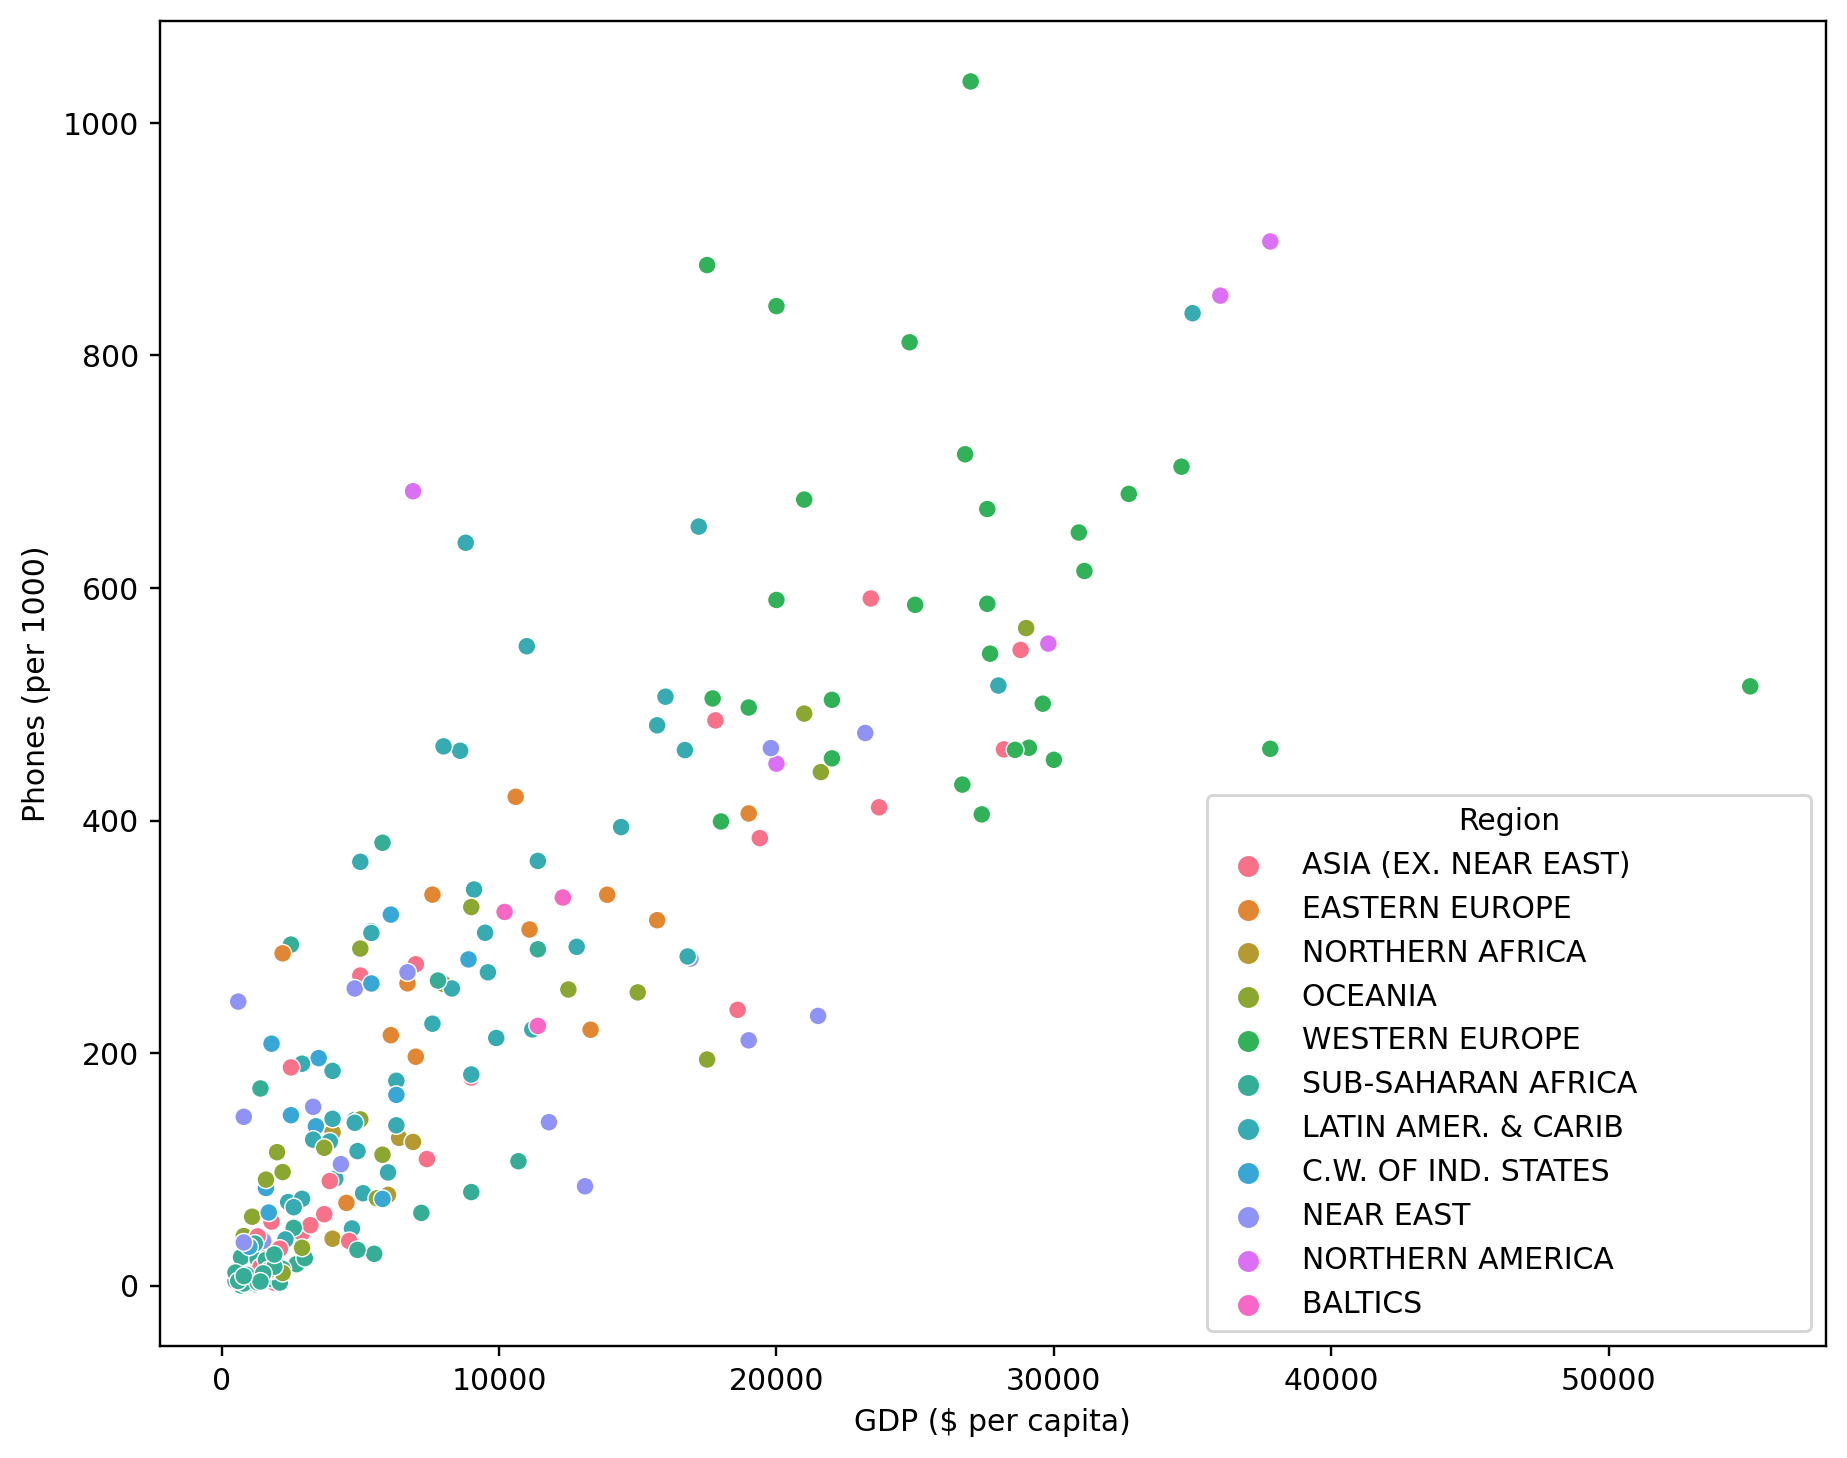

In [29]:
plt.figure(figsize=(10, 8), dpi=215)

sns.scatterplot(data=df, x='GDP ($ per capita)', y='Phones (per 1000)', hue='Region')

plt.show()

**Задание: Постройте график scatterplot для колонок "GDP per Capita" и "Literacy" (раскрасьте график по колонке Region). Какие выводы можно сделать из этого графика?**

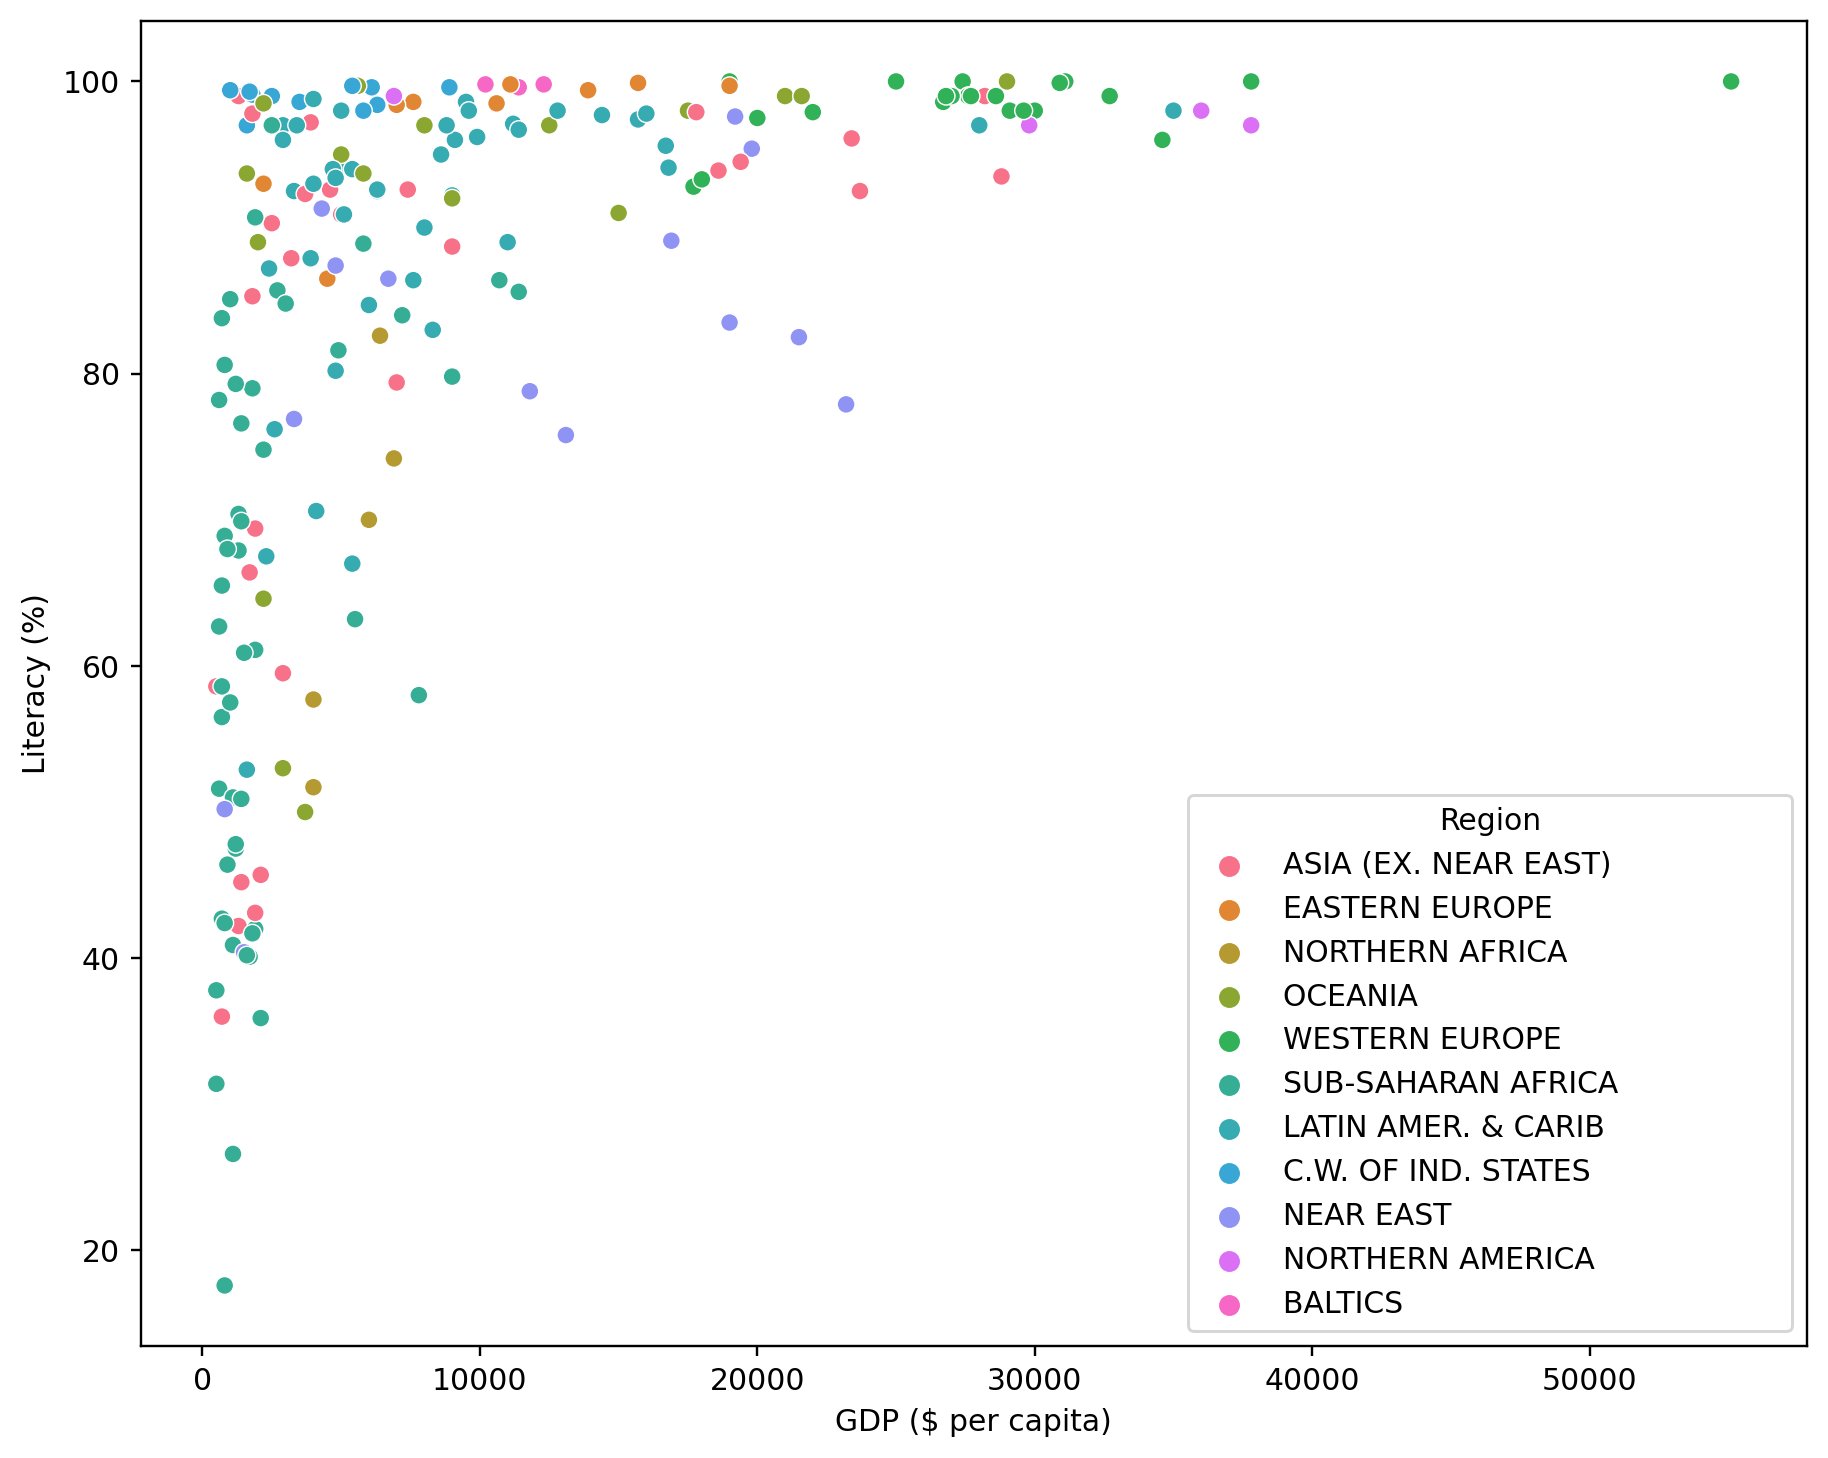

In [30]:
plt.figure(figsize=(10, 8), dpi=215)

sns.scatterplot(data=df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region')

plt.show()

**Задание: Постройте тепловую карту Heatmap для корреляций между колонками в датафрейме.**

/var/folders/jg/_146l5vj16z93k8wbds4ynm40000gn/T/ipykernel_39815/175874327.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot:>

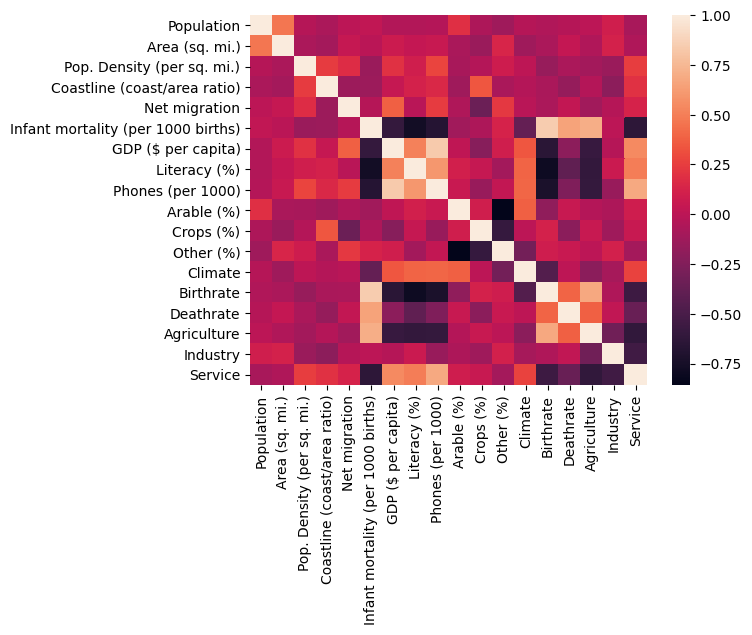

In [33]:
sns.heatmap(df.corr())

**Задание: Seaborn может автоматически выполнять иерархическую кластеризацию данных с помощью функции clustermap(). Постройте график clustermap для корреляций между колонками датафрейма.**

/var/folders/jg/_146l5vj16z93k8wbds4ynm40000gn/T/ipykernel_39815/3955236433.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr())


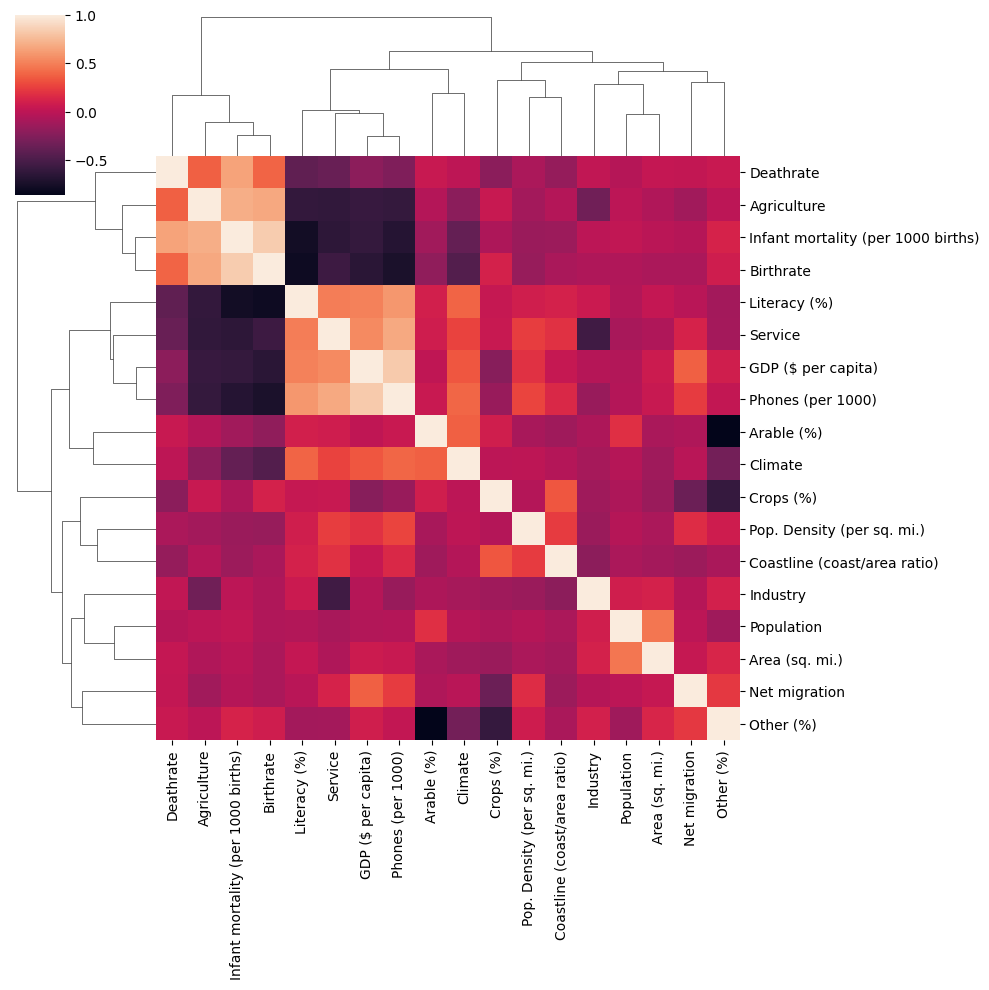

In [34]:
sns.clustermap(df.corr())

-----

## Подготовка данных и модель данных

Давайте подготовим наши данные для кластеризации с помощью метода К-средних!

### Отсутствующие данные (Missing Data)

**Задание: Постройте отчёт - сколько строк имеют отсутствующие значения в той или иной колонке.**

In [65]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**Задание: Для каких стран в колонке Agriculture значения NaN? Что эти страны имеют общего между собой?**

In [66]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**Задание: Вы наверняка заметили, что большинство этих стран являются маленькими островами, кроме Гринландии и Западной Сахары. Замените для этих стран отсутствующие значения нулями, потому что это очень маленькие страны. У Вас должно получиться 15 таких стран. В качестве подсказки вспомните, что мы можем применять вот такой синтаксис:**

    df[df['feature'].isnull()]
    

In [67]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [68]:
df[df['Country'] == 'American Samoa']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.0,15.0,75.0,2.0,22.46,3.27,0.0,0.0,0.0


**Задание: Проверьте заново, в каких колонках сколько строк имеют неопределённые значения:**

In [69]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**Задание: Обратите внимание, что колонка "climate" пустая для нескольких стран. Но для всех стран заполнена колонка Region! Пользуясь этим, замените отсутствующие значения колонки Climate на средние значения этой колонки, где усреднение выполняется для соответствующего региона.**

Подсказка о том, как это можно сделать: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [70]:
df["Climate"] = df.groupby("Region")['Climate'].transform(lambda x: x.fillna(x.mean()))

**Задание: Проверьте заново, сколько теперь отсутствующих значений.**

In [71]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**Задание: Для колонки "Literacy percentage" примените такой же метод, что и ранее для колонки Climate. Замените отсутствующие значения колонки Literacy % на средние значения этой колонки для соответствующего региона.**

In [72]:
df["Literacy (%)"] = df.groupby("Region")['Literacy (%)'].transform(lambda x: x.fillna(x.mean()))

**Задание: Проверьте заново, сколько теперь отсутствующих значений.**

In [73]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

**Задание (Опционально): Теперь данные отсутствуют только для нескольких стран. Либо удалите такие страны, ИЛИ обработайте эти отсутствующие значения по какой-либо выбранной Вами методологии. Чтобы сэкономить Ваше время, мы удалим эти страны.**

In [74]:
df = df.dropna()

In [75]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

## Подготовка данных с признаками

**Задание: пришло время подготовить данные для кластеризации. Колонка Country является уникальным идентификатором, поэтому эта колонка не будет полезной для кластеризации, поскольку она содержит уникальные значения для каждой строки. При создании датафрейма с наборами признаков X удалите эту колонку Country.**

In [76]:
X = df.drop('Country', axis=1)

In [77]:
X

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400
224,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


**Задание: Создайте набор признаков X, причём колонка Region всё ещё является категориальной, поэтому для этой колонки создайте дамми-переменные с помощью Pandas.**

In [78]:
X = pd.get_dummies(X)

In [79]:
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,...,0,0,0,0,1,0,0,0,0,0
223,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,...,0,0,0,0,0,1,0,0,0,0
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,...,0,0,0,0,1,0,0,0,0,0
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,...,0,0,0,0,0,0,0,0,1,0


### Масштабирование данных

**Задание: Поскольку некоторые колонки измеряются в процентах, а некоторые в абсолютных значениях, то выполните масштабирование признаков с помощью Sklearn.**

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [82]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Создание и обучение модели Kmeans




**Задание: Напишите цикл for для создания и обучения нескольких моделей KMeans, проверяя количество кластеров K от 2 до 30. На каждом шаге цикла сохраняйте сумму квадратов расстояний от точек до центров кластеров (SSD - Sum of Squared Distances) для каждого значения K. Далее нанесите эти данные на график, изображая метрику SSD для различных значений К. Опционально: также можно построить график barplot с изменениями метрики SSD.**

In [83]:
from sklearn.cluster import KMeans

In [ ]:
ssd = []
for n in range (2, 31):
    model = KMeans(n_clusters=n)
    
    model.fit(scaled_X)
    
    ssd.append(model.inertia_)

In [28]:
ssd

[5499.047128030876,
 4996.394133196837,
 4683.0358872784145,
 4416.713120871913,
 4074.9543600206016,
 3838.482875567285,
 3587.5334096534625,
 3317.321519886881,
 3000.3507901752655,
 2830.4481278063968,
 2575.758499917748,
 2448.3100994557562,
 2333.0220217296555,
 2187.1361016956994,
 2039.4015975157179,
 1997.5685558615078,
 1923.6719915497479,
 1843.361451656764,
 1824.1595150639773,
 1660.6281225450875,
 1654.8362418448921,
 1597.9794740508664,
 1545.1267369391314,
 1518.5468079968114,
 1459.49834968192,
 1381.3941524283189,
 1375.5804154219827,
 1326.445806106506,
 1287.0962799271265]

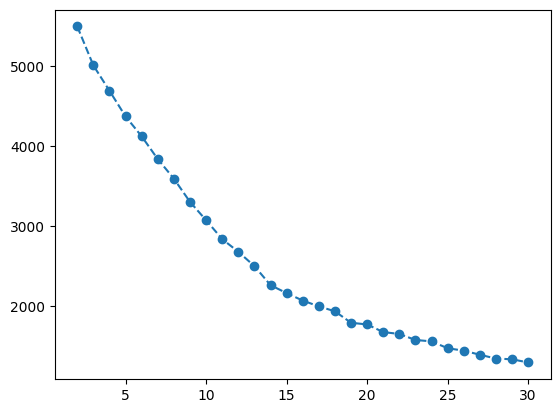

In [85]:
plt.plot(range(2, 31), ssd, 'o--')

plt.show()

<AxesSubplot:>

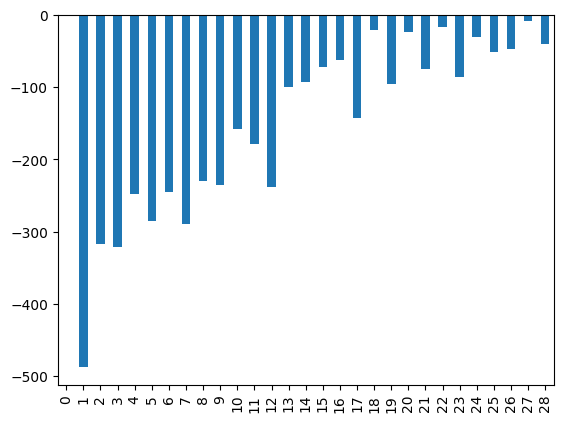

In [86]:
pd.Series(ssd).diff().plot(kind='bar')

-----

# Интерпретация модели


**Задание: Какое значение K может быть хорошим выбором? Возможно таких значений несколько? Какие признаки влияют на формирование этих кластеров? Поскольку это обучение без учителя (unsupervised learning), здесь нет на 100% правильного ответа. Можете посмотреть видео-лекцию с решениями, где мы обсуждаем эту тему.**

In [1]:
# Выберите K на основе метода локтя, а также посмотрите какие признаки влияют на создение кластеров!

# Помните, здесь нет на 100% правильного ответа!

-----


#### Пример: выбираем K=3

**Можно сказать, что в точке K=3 падение метрики SSD более пологое (хотя метрика продолжает уменьшаться после этой точки). Как может выглядеть картина для K=3? Давайте посмотрим, какие признаки являются важными в случае 3 кластеров!**

In [ ]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

In [88]:
model.labels_

array([1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1], dtype=int32)

In [89]:
X['K=3 Clusters'] = model.labels_

In [90]:
X.corr()['K=3 Clusters'].sort_values()

GDP ($ per capita)                           -0.569181
Region_WESTERN EUROPE                        -0.546433
Phones (per 1000)                            -0.468346
Climate                                      -0.394916
Net migration                                -0.350736
Deathrate                                    -0.349512
Region_EASTERN EUROPE                        -0.292451
Arable (%)                                   -0.247835
Service                                      -0.239245
Pop. Density (per sq. mi.)                   -0.175961
Region_BALTICS                               -0.175549
Literacy (%)                                 -0.090537
Region_SUB-SAHARAN AFRICA                    -0.083455
Region_NORTHERN AMERICA                      -0.081303
Region_ASIA (EX. NEAR EAST)                   0.006692
Area (sq. mi.)                                0.024944
Other (%)                                     0.060607
Infant mortality (per 1000 births)            0.064532
Population

------------
-------------

# Бонусное задание:
## Географическая интерпретация модели

Результаты этой модели можно очень удобно визуализировать на географической карте! **Замечание: это бонусное задание. В этом задании Вам могут понадобится вещи, которые мы не проходили в лекциях. Если что-то не получается, то не стесняйтесь перейти к блокноту с решениями!**

----
----

**Задание: Создайте кластеры для выбранного значения K. В нашем варианте решений мы думаем, что варианты K=3 или K=15 являются разумными вариантами. Но Вы можете попробовать и другие варианты для количества кластеров.**

In [35]:
model_3 = KMeans(n_clusters=3)

In [36]:
model_15 = KMeans(n_clusters=15)

**Задание: А теперь представьте, что Ваш босс попросил Вас нанести эти страны и кластеры на географическую карту. Сможете ли Вы выяснить, как это делается? В качестве подсказки мы приводим шаги, а также пример того, как выглядит результат:**

1. Выясните, как можно установить библиотеку plotly: https://plotly.com/python/getting-started/

2. Выясните, как можно создать географическую карту choropleth map с помощью plotly: https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries

3. Вам понадобятся ISO-коды. Либо возьмите их из Википедии, или используйте тот файл, который мы для Вас подготовили: **"../DATA/country_iso_codes.csv"**

4. С помощью номеров кластеров для стран, кодов ISO и названий стран постройте карту мира с помощью plotly.


**Замечание: Это задание моделирует ситуацию, с которой Вы можете столкнуться в работе. У Вас есть конкретная цель, и Вам нужно будет поработать с документацией, чтобы написать решение для этой задачи. Так что Вам нужно будет самостоятельно собрать решение из отдельных кусочков. Если у Вас что-то будет не получаться, то не волнуйтесь! Не стесняйтесь подглядывать в блокнот с решениями.**



In [92]:
iso_codes = pd.read_csv("../DATA/country_iso_codes.csv")

In [93]:
iso_codes

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
...,...,...
296,"Congo, Dem. Rep.",COD
297,"Congo, Repub. of the",COG
298,Tanzania,TZA
299,Central African Rep.,CAF


In [94]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [95]:
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [100]:
df['ISO Code'] = df['Country'].map(iso_mapping)

In [108]:
df['Cluster'] = model.labels_

In [109]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster",
                    hover_name="Country",
                    color_continuous_scale='Turbo'
                    )
fig.show()

---